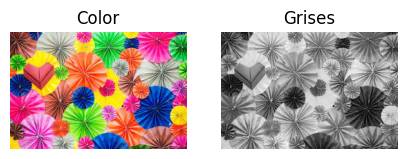

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [5,2.5]




def Imagen(turip):
    
    imageInicial = cv2.imread(turip)


    plt.subplot(121)
    plt.title("Color")
    plt.imshow(cv2.cvtColor(imageInicial, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(122)
    plt.title("Grises")
    plt.imshow(cv2.cvtColor(imageInicial, cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.axis('off')


    imagenrgb = cv2.cvtColor(imageInicial, cv2.COLOR_BGR2RGB)


    cv2.imwrite('ImagenRGB.jpg', imagenrgb)
    cv2.imwrite('SinColorsito.jpg', cv2.cvtColor(imageInicial, cv2.COLOR_BGR2GRAY))


    imagenrgb = cv2.cvtColor(imageInicial, cv2.COLOR_BGR2RGB)


Imagen(r"C:/Universidad/QuintoSemestre/PDI/Imagenes/dd3.jpg")

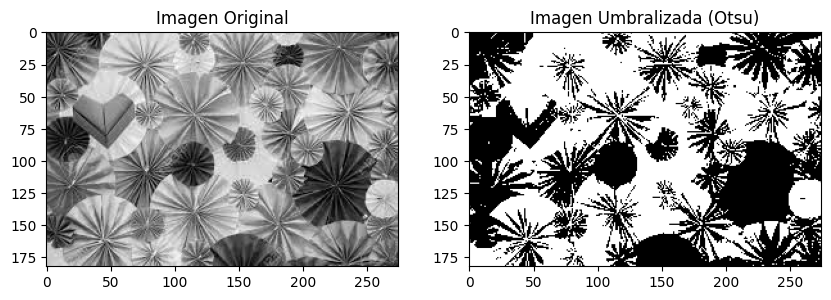

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = cv2.imread(r"C:/Universidad/QuintoSemestre/PDI/Imagenes/dd3.jpg", 0)  # Carga la imagen en escala de grises

# Calcular el histograma de la imagen
histograma = cv2.calcHist([imagen], [0], None, [256], [0, 256])

# Método de Otsu para umbralizar la imagen
_,imagen_umbralizada = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Imagen Umbralizada (Otsu)')

plt.show()


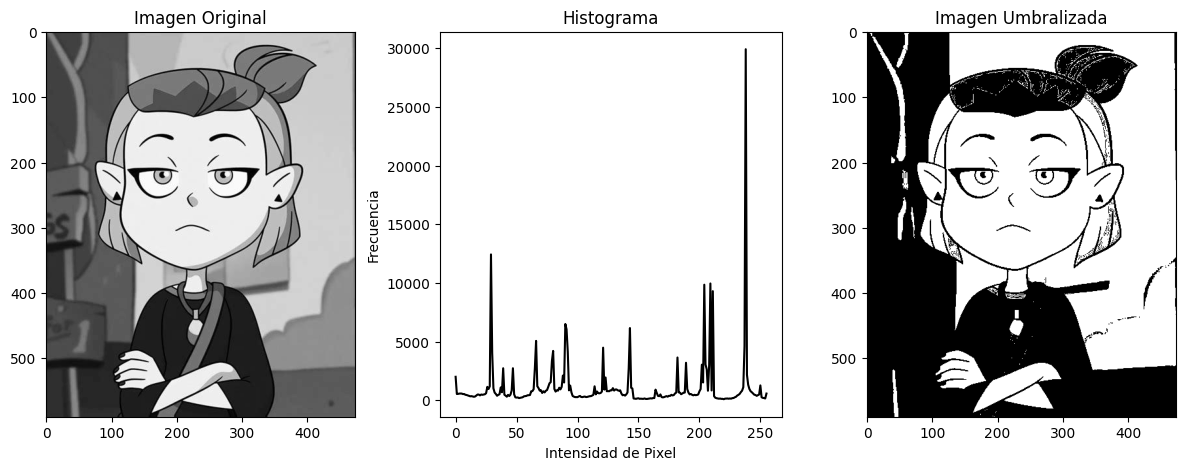

In [7]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
imagen = cv2.imread(r"C:/Universidad/QuintoSemestre/PDI/Imagenes/dd4.jpg", cv2.IMREAD_GRAYSCALE)

# Calcular el histograma de la imagen original
histograma = cv2.calcHist([imagen], [0], None, [256], [0, 256])

# Aplicar umbralización manual
umbral = 127  # Valor de umbral arbitrario
_, imagen_umbralizada = cv2.threshold(imagen, umbral, 255, cv2.THRESH_BINARY)

# Mostrar la imagen original, su histograma y la imagen umbralizada
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.plot(histograma, color='black')
plt.title('Histograma')
plt.xlabel('Intensidad de Pixel')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Imagen Umbralizada')

plt.show()


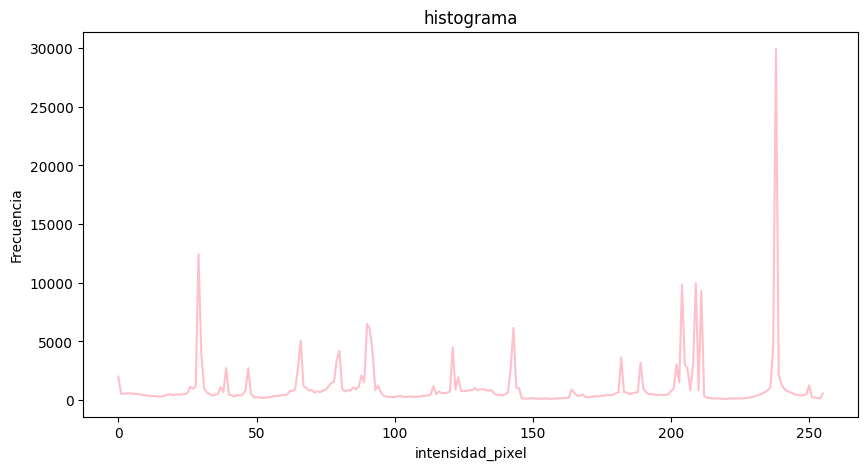

In [3]:
import cv2
import matplotlib.pyplot as plt


def histograma(imagen):
    histo=cv2.calcHist([imagen],[0],None,[256],[0,256])
    plt.figure(figsize=(10,5))
    plt.plot(histo,color="pink")
    plt.title("histograma")
    plt.xlabel("intensidad_pixel")
    plt.ylabel("Frecuencia")
imagen = cv2.imread(r"C:/Universidad/QuintoSemestre/PDI/Imagenes/dd4.jpg", 0)

histograma(imagen)

Text(0.5, 1.0, 'Imagen binaria inversa')

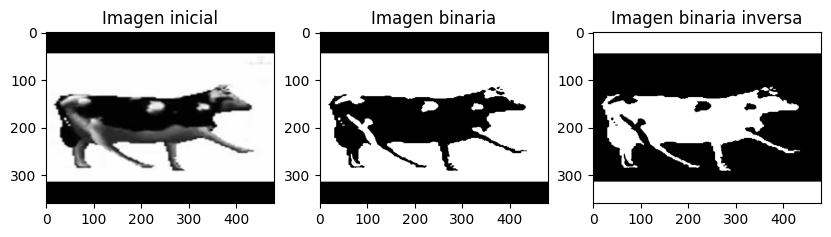

In [15]:
import cv2
import matplotlib.pyplot as plt

imagen = cv2.imread(r"C:/Universidad/QuintoSemestre/PDI/Imagenes/dd5.jpg", 0) 
_, umbralbi = cv2.threshold(imagen,127,255, cv2.THRESH_BINARY) # BLANCO Y NEGRO
_, umbral_inc_bi = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY_INV) # Inversa Blanco y negro

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(imagen, cmap='gray')
plt.title("Imagen inicial")

plt.subplot(132)
plt.imshow(umbralbi, cmap="gray")
plt.title("Imagen binaria")

plt.subplot(133)
plt.imshow(umbral_inc_bi, cmap="gray")
plt.title("Imagen binaria inversa")

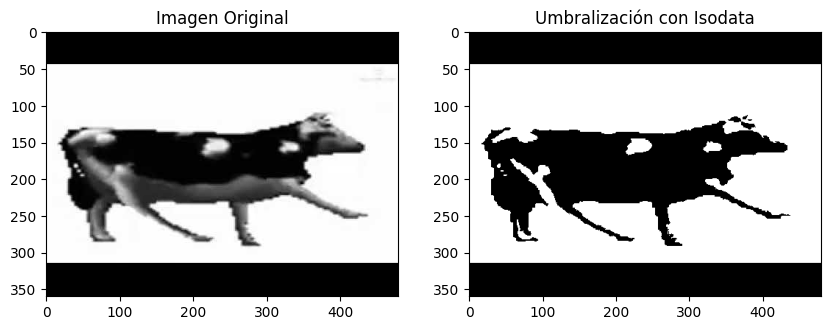

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Función que aplica la umbralización global con el algoritmo de Isodata
def isodata(image):
    # Umbral inicial decidimos del espectro de 0 a 255
    threshold = 128
    
    while True:
        # Se divide la imagen en dos grupos según el umbral
        
        groupo1 = image[image <= threshold] # grupo donde el umbral es menor o igual al determinado
        groupo2 = image[image > threshold] # grupo donde el umbral es mayor al determinado
        
        # Se calcula la media de cada grupo
        media1 = np.mean(groupo1)
        media2 = np.mean(groupo2)
        
        # Nuevo umbral
        nuevo_umbral = (media1 + media2) / 2 # segun formula 
        
        # Si el nuevo umbral es igual al umbral anterior, se detiene el bucle
        if abs(nuevo_umbral - threshold) < 0.5:
            break
        
        threshold = nuevo_umbral
    
    return threshold

# imagen en canal 0
imagen = cv2.imread(r"C:/Universidad/QuintoSemestre/PDI/Imagenes/dd5.jpg", 0) 

# llamamos a funcion con imagen seleccionada 
umbral_isodata = isodata(imagen)

# Umbralización de la imagen
_, imagen_umbralizada = cv2.threshold(imagen, umbral_isodata, 255, cv2.THRESH_BINARY) #OJO el "_" es una variable pero que ignoramos (almacena el valor del umbral) 

# Mostramos la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')


plt.subplot(1, 2, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralización con Isodata')


plt.show()

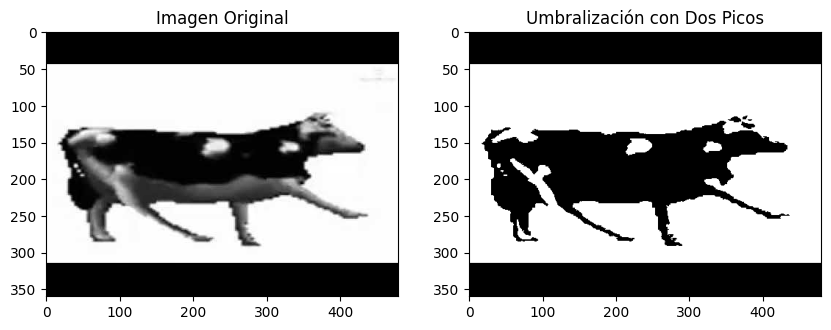

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para aplicar la umbralización global con el algoritmo de dos picos
def dos_picos(image):
    # Calculamos el histograma de la imagen
    hist = cv2.calcHist([image],[0],None,[256],[0,256])# EN ESTE CASO SI O SO HACEMOS USO DEL HISTOGRAMA
    
    # Encontramos los dos picos en el histograma
    pico = np.array(hist)# almacenamos los picos en un array 
    pico = pico.flatten()#aplana el array a una dimension
    pico_diff = np.diff(pico)#buscamos diferencias entre los datos
    primer_pico = np.argmax(pico_diff[:128]) # buscamos el pico hasta 127
    segundo_pico = np.argmax(pico_diff[128:]) + 128 # buscamos el pico desde 128 para adelante 
    
    # El umbral se toma como el promedio de los dos picos
    umbral = int((primer_pico + segundo_pico) / 2)
    
    return umbral

# Cargamos la imagen en escala de grises
imagen = cv2.imread(r"C:/Universidad/QuintoSemestre/PDI/Imagenes/dd5.jpg", 0) 

# Aplicamos la umbralización global con el algoritmo de dos picos
umbral_dos_picos = dos_picos(imagen)

# Umbralización de la imagen
_, imagen_umbralizada = cv2.threshold(imagen, umbral_dos_picos, 255, cv2.THRESH_BINARY)

# Mostramos la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')


plt.subplot(1, 2, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralización con Dos Picos')


plt.show()

Text(0.5, 1.0, 'Imagen binaria inversa')

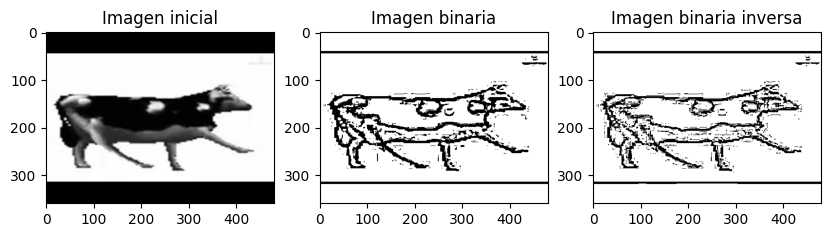

In [30]:
import cv2
import matplotlib.pyplot as plt

imagen = cv2.imread(r"C:/Universidad/QuintoSemestre/PDI/Imagenes/dd5.jpg", 0) 
umb_adap = cv2.adaptiveThreshold(imagen, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=11, C=2)
umb_adap_gauss = cv2.adaptiveThreshold(imagen, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=11, C=2)



plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(imagen, cmap='gray')
plt.title("Imagen inicial")

plt.subplot(132)
plt.imshow(umb_adap, cmap="gray")
plt.title("Imagen binaria")

plt.subplot(133)
plt.imshow(umb_adap_gauss, cmap="gray")
plt.title("Imagen binaria inversa")

